## 練習時間
資料的操作有很多，接下來的馬拉松中我們會介紹常被使用到的操作，參加者不妨先自行想像一下，第一次看到資料，我們一般會想知道什麼訊息？

#### Ex: 如何知道資料的 row 數以及 column 數、有什麼欄位、多少欄位、如何截取部分的資料等等

有了對資料的好奇之後，我們又怎麼通過程式碼來達成我們的目的呢？

#### 可參考該[基礎教材](https://bookdata.readthedocs.io/en/latest/base/01_pandas.html#DataFrame-%E5%85%A5%E9%97%A8)或自行 google

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)

Path of read in data: ./data/application_train.csv


### 如果沒有想法，可以先嘗試找出剛剛例子中提到的問題的答案
#### 資料的 row 數以及 column 數

In [4]:
app_train.shape

(307511, 122)

#### 列出所有欄位

In [5]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### 截取部分資料

In [6]:
app_train[2000:2005]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2000,102345,0,Cash loans,F,N,Y,0,225000.0,820638.0,32674.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
2001,102348,0,Cash loans,F,Y,Y,0,54000.0,119925.0,11988.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2002,102349,0,Cash loans,F,N,N,1,234000.0,1374480.0,49500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
2003,102350,0,Revolving loans,M,Y,N,0,247500.0,427500.0,21375.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
2004,102351,0,Cash loans,M,N,N,0,297000.0,229500.0,22828.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0


In [7]:
app_train.loc[2000:2005,"NAME_CONTRACT_TYPE":"AMT_INCOME_TOTAL"] 

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL
2000,Cash loans,F,N,Y,0,225000.0
2001,Cash loans,F,Y,Y,0,54000.0
2002,Cash loans,F,N,N,1,234000.0
2003,Revolving loans,M,Y,N,0,247500.0
2004,Cash loans,M,N,N,0,297000.0
2005,Revolving loans,F,N,Y,0,180000.0


In [8]:
app_train.iloc[2000:2005,1:8] 

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL
2000,0,Cash loans,F,N,Y,0,225000.0
2001,0,Cash loans,F,Y,Y,0,54000.0
2002,0,Cash loans,F,N,N,1,234000.0
2003,0,Revolving loans,M,Y,N,0,247500.0
2004,0,Cash loans,M,N,N,0,297000.0


iloc 對應的是整數位置 index，意即 df.iloc [ integer ]<br>
loc 對應的是標籤 index，df.loc [ label ]

###### 還有各種數之不盡的資料操作，重點還是取決於實務中遇到的狀況和你想問的問題，在馬拉松中我們也會陸續提到更多例子

### 看看是否有缺失值

#### app_train.isnull().sum()

In [9]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
app_train.isnull().any().describe()

count      122
unique       2
top       True
freq        67
dtype: object

In [11]:
def missing_data(data):
    total = data.isnull().sum() #Pandas通常使用.isnull()來找缺失值，.sum()則是計算缺失的數量
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # pd.concat(objs合併的東西,axis合併的方向,keys索引)
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
   #return(np.transpose(tt[tt["Percent"]>0]))
missing_data(app_train)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Total,0,0,0,0,0,0,0,0,0,12,...,0,0,0,0,41519,41519,41519,41519,41519,41519
Percent,0,0,0,0,0,0,0,0,0,0.0039023,...,0,0,0,0,13.5016,13.5016,13.5016,13.5016,13.5016,13.5016
Types,int64,int64,object,object,object,object,int64,float64,float64,float64,...,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64


#### 各種統計量

In [12]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


#### label是否imbalence?

In [13]:
import seaborn as sns
sns.countplot(app_train['TARGET'])

#### Feature之間關連性

In [14]:
df=app_train.iloc[::100,0:12]

In [15]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied
100,100119,0,Revolving loans,F,N,Y,0,54000.0,180000.0,9000.0,180000.0,Unaccompanied
200,100233,0,Cash loans,F,N,Y,0,216000.0,679671.0,28926.0,607500.0,Unaccompanied
300,100345,0,Cash loans,F,N,N,0,157500.0,450000.0,17095.5,450000.0,Unaccompanied
400,100463,0,Cash loans,F,N,N,0,112500.0,263686.5,15268.5,238500.0,Unaccompanied


In [16]:
df2=pd.get_dummies(df.iloc[:,2:4]) # 在pandas上實現one-hot encoding
df2.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M
0,1,0,0,1
100,0,1,1,0
200,1,0,1,0
300,1,0,1,0
400,1,0,1,0


In [17]:
app_train=pd.get_dummies(app_train)

C:\Users\allen\Anaconda3\envs\tensorflow-GPU\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\allen\Anaconda3\envs\tensorflow-GPU\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

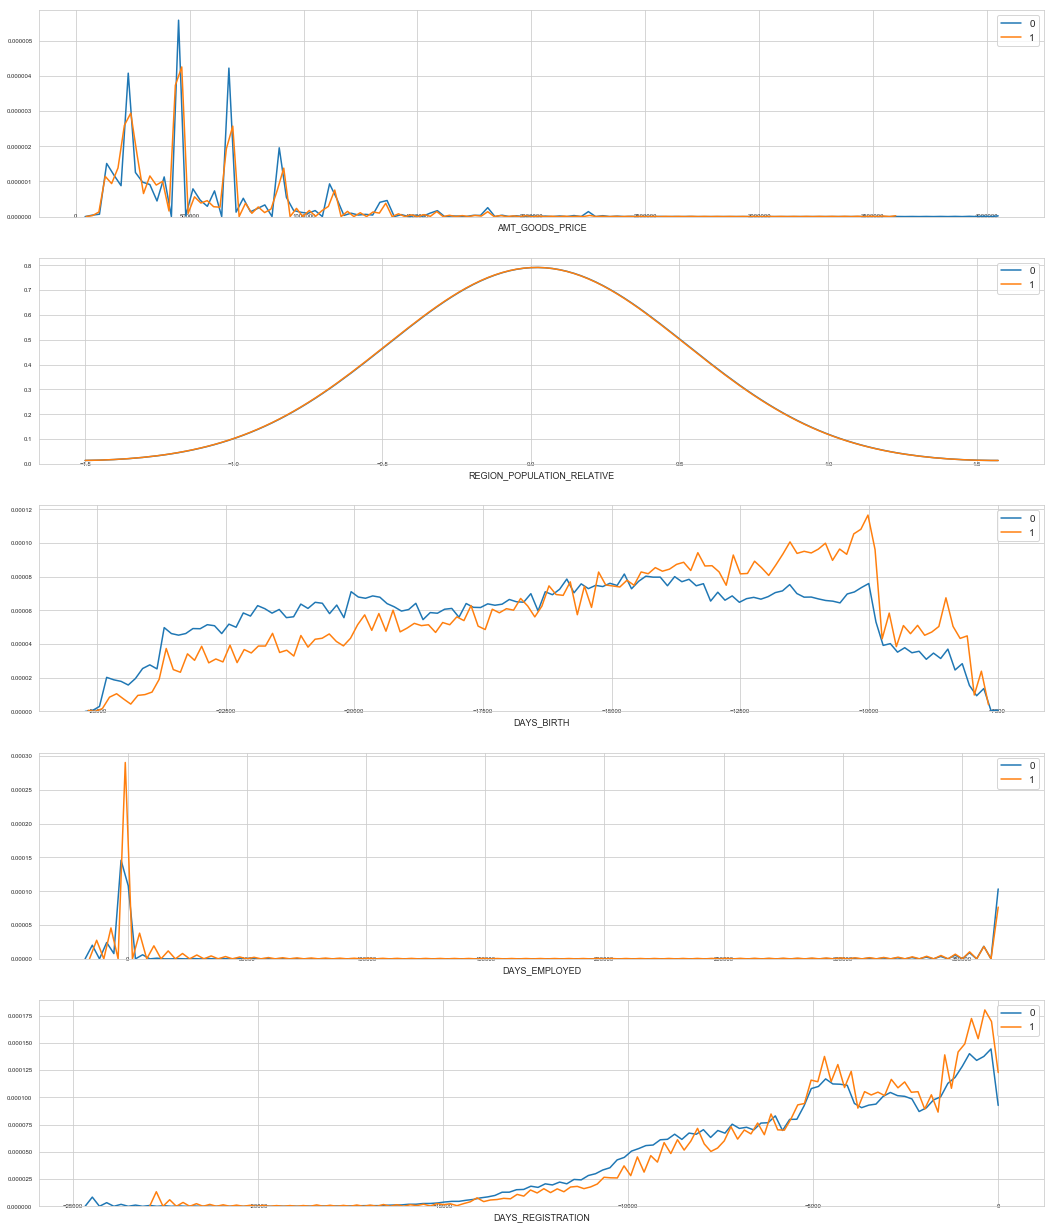

In [20]:
import matplotlib.pyplot as plt
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(5,1,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1) #核密度函數:繪製平滑分布估計圖
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();
    
t0 = app_train.loc[app_train['TARGET'] == 0]
t1 = app_train.loc[app_train['TARGET'] == 1]
features = app_train.columns.values[6:11]
plot_feature_distribution(t0, t1, '0', '1', features)